In [ ]:
import csv
import cv2
import numpy as np 
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

lines=[]
with open("data/driving_log.csv") as logs:
    reader = csv.reader(logs)
    for line in reader:
        lines.append(line)
lines = lines[1:]
lines[0]

Using TensorFlow backend.
C:\Users\my pc\.conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\my pc\.conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\my pc\.conda\envs\carnd-term1\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\my pc\.conda\envs\carnd-term1

['IMG/center_2016_12_01_13_30_48_287.jpg',
 ' IMG/left_2016_12_01_13_30_48_287.jpg',
 ' IMG/right_2016_12_01_13_30_48_287.jpg',
 ' 0',
 ' 0',
 ' 0',
 ' 22.14829']

In [ ]:
images = []
measurements = []
for i,line in enumerate (lines):
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = "data/IMG/" + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurements.append(float(line[3]))
    

(8036, 160, 320, 3)
(8036,)


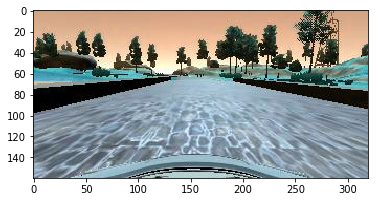

In [ ]:


X_train = np.array(images)
y_train = np.array(measurements)
print(X_train.shape)
print(y_train.shape)
plt.imshow(X_train[1])

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(160, 320, 3)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=7, validation_split=0.2, shuffle=True)
model.save('model.h5')

Train on 6428 samples, validate on 1608 samples
Epoch 1/7
6428/6428 [==============================] - 5s 782us/step - loss: 7804519.0705 - val_loss: 3361.8316
Epoch 2/7
6428/6428 [==============================] - 5s 797us/step - loss: 3335.6996 - val_loss: 2793.1292
Epoch 3/7
6428/6428 [==============================] - 6s 856us/step - loss: 2703.2549 - val_loss: 3422.3716
Epoch 4/7
6428/6428 [==============================] - 6s 908us/step - loss: 2244.8813 - val_loss: 4142.7364
Epoch 5/7
6428/6428 [==============================] - 6s 900us/step - loss: 2031.4635 - val_loss: 1413.2534
Epoch 6/7
6428/6428 [==============================] - 6s 902us/step - loss: 1856.9782 - val_loss: 7273.1835
Epoch 7/7
6428/6428 [==============================] - 6s 868us/step - loss: 2064.6446 - val_loss: 1266.0386
